In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
This tries to cluster the selected tokens by they means among their own groups.
"""

import gensim
import numpy as np

word_vector=gensim.models.KeyedVectors.load_word2vec_format('./pre_trained_wv/wv.txt')
word_vec_for_classes={'name':[],'location':[],'time':[],'contact':[],'ID':[],'profession':[],'biomarker':[],
               'family':[],'clinical_event':[],'special_skills':[],'unique_treatment':[],'account':[],
               'organization':[],'education':[],'money':[],'belonging_mark':[],'med_exam':[]}

token_list=np.load('./pre_processed_data/token_list.npy',allow_pickle=True)
token_list=np.array(token_list.tolist(),dtype=object)[:,1]
token_set=set()
for article in token_list:
    for token in article:
        if not token[3] in token_set:
            token_set.add(token[3])
            try:
                word_vec_for_classes[token[4]].append(word_vector.get_vector(token[3]))
            except KeyError:
                pass
word_vec_for_classes_centers={key:sum(word_vec_for_classes[key])/len(word_vec_for_classes[key]) if len(word_vec_for_classes[key]) !=0 else np.zeros(300) for key in word_vec_for_classes.keys()}

def cloest_category(vec,word_vec_for_classes_centers):
    from sklearn.metrics.pairwise import cosine_similarity
    minimun_distance=-1
    for key in word_vec_for_classes_centers.keys():
        print(cosine_similarity([vec],[word_vec_for_classes_centers[key]]))
        if cosine_similarity([vec],[word_vec_for_classes_centers[key]])>minimun_distance:
            minimun_distance=cosine_similarity([vec],[word_vec_for_classes_centers[key]])
            return_category=key
    return minimun_distance,return_category



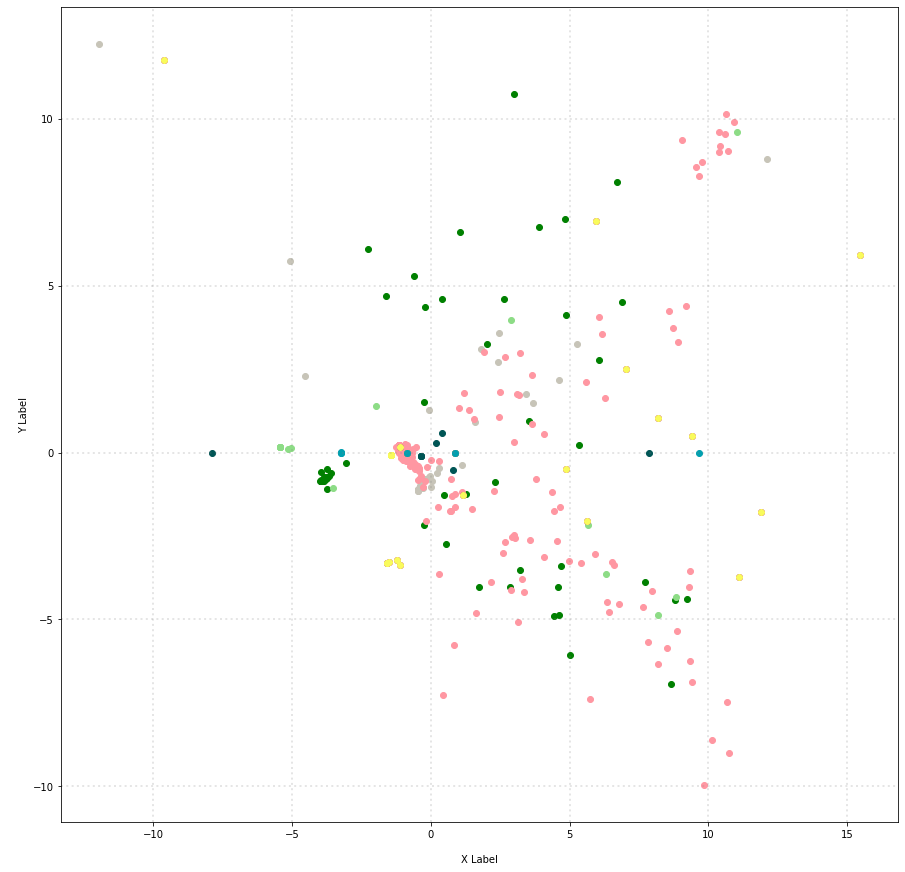

In [8]:
"""
The following graph shows each class with a unique hue, only
'time' category which also has most labels appears to have it's group tighted up more closely.
"""


from sklearn.decomposition import PCA
reduction_word_vec_for_classes={'name':[],'location':[], 'time':[],'contact':[],'ID':[],
                                'profession':[],'biomarker':[],'family':[], 'clinical_event':[],
                                'special_skills':[], 'unique_treatment':[], 'account':[],
                                'organization':[],'education':[],'money':[], 'belonging_mark':[],
                                'med_exam':[]}

for w in word_vec_for_classes.keys():
    if len(word_vec_for_classes[w]) ==0 or len(word_vec_for_classes[w]) ==1:
        #reduction_word_vec_for_classes[w]=np.array([0,0])
        pass
    else:
        reduction_word_vec_for_classes[w]=PCA(n_components = 2).fit_transform(word_vec_for_classes[w])

import matplotlib.pyplot as plt
col = ['#c7c4b8', '#008000', '#ff97a2', '#00a0b0','#005555','#b00983','#f9fb5c',
       '#8ddc86','#00c2c7','#c7c4b8', '#008000', '#ff97a2', '#00a0b0','#005555','#b00983','#f9fb5c',]

# plot
fig = plt.figure(figsize = (15,15))
ax = fig.subplots()

for c, category in zip(col, reduction_word_vec_for_classes.keys()):
    try:
        xs = reduction_word_vec_for_classes[category].T[0]
        ys = reduction_word_vec_for_classes[category].T[1]
    except AttributeError:
        pass
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()        

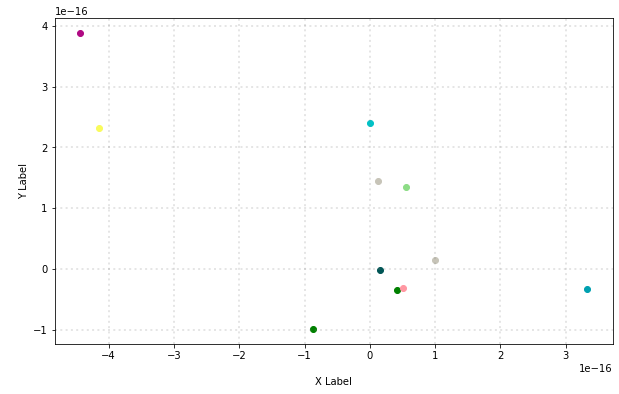

In [10]:
"""
The mean of each class' points in space are very close to zero 
which I think it indicates that my w2v space doesn't constructs 
the vector very nicely so it's now a evenly distributed kinda shape.
"""
reduction_word_vec_for_classes_centers={}
for key in reduction_word_vec_for_classes.keys():
    try:
        reduction_word_vec_for_classes_centers[key]=sum(reduction_word_vec_for_classes[key])/len(reduction_word_vec_for_classes[key])
    except ZeroDivisionError:
        pass
    
import matplotlib.pyplot as plt
col = ['#c7c4b8', '#008000', '#ff97a2', '#00a0b0','#005555','#b00983','#f9fb5c',
       '#8ddc86','#00c2c7','#c7c4b8', '#008000', '#ff97a2', '#00a0b0','#005555','#b00983','#f9fb5c',]

# plot
fig = plt.figure(figsize = (10,6))
ax = fig.subplots()

for c, category in zip(col, reduction_word_vec_for_classes_centers.keys()):
    xs = reduction_word_vec_for_classes_centers[category].T[0]
    ys = reduction_word_vec_for_classes_centers[category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()  